Riddler Express
From Taylor Firman, the unluck of the draw:

Lotería is a traditional Mexican game of chance, akin to bingo. Each player receives a four-by-four grid of images. Instead of a comically large rotating bin of numbered balls, the caller randomly draws a card from a deck containing all 54 possible images. If a player has that image on their grid, they mark it off. The exact rules can vary, but in this version, the game ends when one of the players fills their entire card (and screams “¡Lotería!”). Each of the 54 possible images can only show up once on each card, but other than that restriction, assume that image selection and placement on each player’s grid is random.

One beautiful day, you and your friend Christina decide to face off in a friendly game of Lotería. What is the probability that either of you ends the game with an empty grid, i.e. none of your images was called? How does this probability change if there were more or fewer unique images? Larger or smaller player grids?

Solution by Mark Mace

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random

In [2]:
# TAKES A GIVEN DECK FO CARDS, PICKS AT RANDOM AN ENTRY, REMOVES ENTRY FROM DECK, AND RETURNS PICKED ENTRY #
def draw(deck):
    pick=random.randint(0,len(deck)-1)
    image=deck[pick]
    del deck[pick]
    return image


In [3]:
# PLAYS A ROUND OF LOTERIA WITH TWO PLAYERS #
# TotNumberOfCards -- TOTAL NUMBER OF PLAYING CARDS -- IN PROBLEM THIS IS 54 #
# NumGridCards -- TOTAL NUMBER OF CARDS FOR A PLAYERS GRID -- IN PROBLEM THIS IS 4 #

def PlayRound(TotNumberOfCards,NumGridCards):
    Grid1=[] # PLAYER 1 GRID OF IMAGES #
    Grid2=[] # PLAYER 2 GRID OF IMAGES #

    BaseCards=[i for i in range(0,TotNumberOfCards)] # ALL POSSIBLE CARDS CHOICES #
    # PLAYER 1 GRID IS DETERMINED #
    for i in range(NumGridCards):
        Grid1.append(draw(BaseCards))

    BaseCards=[i for i in range(0,TotNumberOfCards)]
    # PLAYER 2 GRID IS DETERMINED #
    for i in range(NumGridCards):
        Grid2.append(draw(BaseCards))

    P1Left=len(Grid1) # STARTING VALUE FOR NUMBER OF IMAGES PLAYER 1 HAS LEFT ON THEIR GRID #
    P2Left=len(Grid2) # STARTING VALUE FOR NUMBER OF IMAGES PLAYER 2 HAS LEFT ON THEIR GRID #

        
    PlayingCards=[i for i in range(0,TotNumberOfCards)] # INITIALIZE OUR PLAYING CARDS #
    PCardsLeft=len(PlayingCards) # INITIALIZE VALUE FOR PLAYING CARDS LEFT

    # KEEP PLAYING UNTIL PLAYER 1 OR 2 WIN #
    while(P1Left>0 and P2Left>0):
        
        pickedCard=draw(PlayingCards) # DRAW CARD #

        if pickedCard in Grid1: Grid1.remove(pickedCard) # REMOVE ENTRY IF PLAYER 1 HAS ON THEIR GRID #
        if pickedCard in Grid2: Grid2.remove(pickedCard) # REMOVE ENTRY IF PLAYER 2 HAS ON THEIR GRID #

        # UPDATE COUNTS #
        P1Left=len(Grid1)
        P2Left=len(Grid2)
        PCardsLeft=len(PlayingCards)

    if(P1Left==NumGridCards or P2Left==NumGridCards):
        return 1 # IF EITHER PLAY HAS AN UNTOUCHED GRID #
    else:
        return 0 # IF BOTH PLAYERS HAVE HAD IMAGES SELECTED #


In [4]:
# STANDARD VERSION OF THE GAME
NumberOfGames=5000000
nCards=54
nGridCards=4
AllGames=[PlayRound(nCards,nGridCards) for i in range(NumberOfGames)]
prob=np.mean(AllGames)
print("Probability of having one empty grid is: ",prob*100,"% for grids of size ",nGridCards," with ",nCards," total images")

Probability of having one empty grid is:  2.07742 % for grids of size  4  with  54  total images


In [5]:
# CHANGING THE NUMBER OF IMAGES AND THE PLAYER GRID SIZE #

NumberOfGames=10000 # FOR GIVEN CONFIGURATION #

ListOfProbabilities=[] # KEEP TRACK OF PROBAIBLITy
for nCards in range(10,80,5):
    for nGridCards in range(1,5):
#         print(nGridCards,nCards)
        AllGames=[PlayRound(nCards,nGridCards) for i in range(NumberOfGames)]
        prob=np.mean(AllGames)
        ListOfProbabilities.append([nGridCards,nCards,prob])


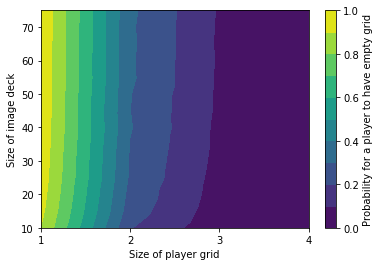

In [6]:
# PLOT PROBABILITIES #

ListOfProbabilities=np.array(ListOfProbabilities)
x=ListOfProbabilities[:,0]
y=ListOfProbabilities[:,1]
z=ListOfProbabilities[:,2]

plt.tricontourf(x,y,z, 10) # choose 20 contour levels, just to show how good its interpolation is

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Size of player grid')
plt.ylabel('Size of image deck')
cbar = plt.colorbar()
cbar.set_label('Probability for a player to have empty grid')